In [62]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree

# Para realizar la regresión lineal y la evaluación del modelo
# -----------------------------------------------------------------------
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


from sklearn.model_selection import KFold,LeaveOneOut, cross_val_score

from tqdm import tqdm


# Ignorar los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

In [63]:
df = pd.read_csv("../../datos/encoded_it1.csv", index_col = 0)

In [64]:
df.head()

,dateCrawled,price,vehicleType,yearOfRegistration,gearbox,powerCV,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,lastSeen,abtest_control,abtest_test
0,6065.879563,480.0,5373.855068,4737.005685,4865.179692,-0.382606,0.0,2842.952996,5194.343734,5482.137159,3498.590743,6063.274713,7060.183256,0.0,1.0
1,6065.879563,18300.0,12837.225874,12610.525151,4865.179692,1.218855,-0.5,6210.592551,8615.459563,9051.491259,2472.504316,6063.274713,7060.183256,0.0,1.0
2,6065.879563,9800.0,13321.706814,4737.005685,10741.705529,0.790609,-0.5,6208.520949,8615.459563,11142.862821,3498.590743,6063.274713,7060.183256,0.0,1.0
3,6065.879563,1500.0,2951.394227,4737.005685,4865.179692,-0.642369,0.0,6362.532643,5194.343734,5482.137159,7187.912351,6063.274713,4845.496188,0.0,1.0
4,6065.879563,3600.0,2951.394227,4737.005685,4865.179692,-0.741195,-1.2,7032.572993,8615.459563,6544.456833,7187.912351,6063.274713,7060.183256,0.0,1.0


In [65]:
X = df.drop(columns= ["price"])
y = df["price"]

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
params_tree = {
    'max_depth': [6, 8, 10, 20],
    'min_samples_split': [10, 50],
    'min_samples_leaf': [10, 50],
    'max_leaf_nodes': [10, 20, 40, 80, 160]
}

decision_tree = DecisionTreeRegressor()
grid_search = GridSearchCV(estimator=decision_tree, param_grid=params_tree, cv = 5, scoring="neg_mean_squared_error")

In [68]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [6, 8, 10, 20],
                         'max_leaf_nodes': [10, 20, 40, 80, 160],
                         'min_samples_leaf': [10, 50],
                         'min_samples_split': [10, 50]},
             scoring='neg_mean_squared_error')

In [69]:
best_tree = grid_search.best_estimator_

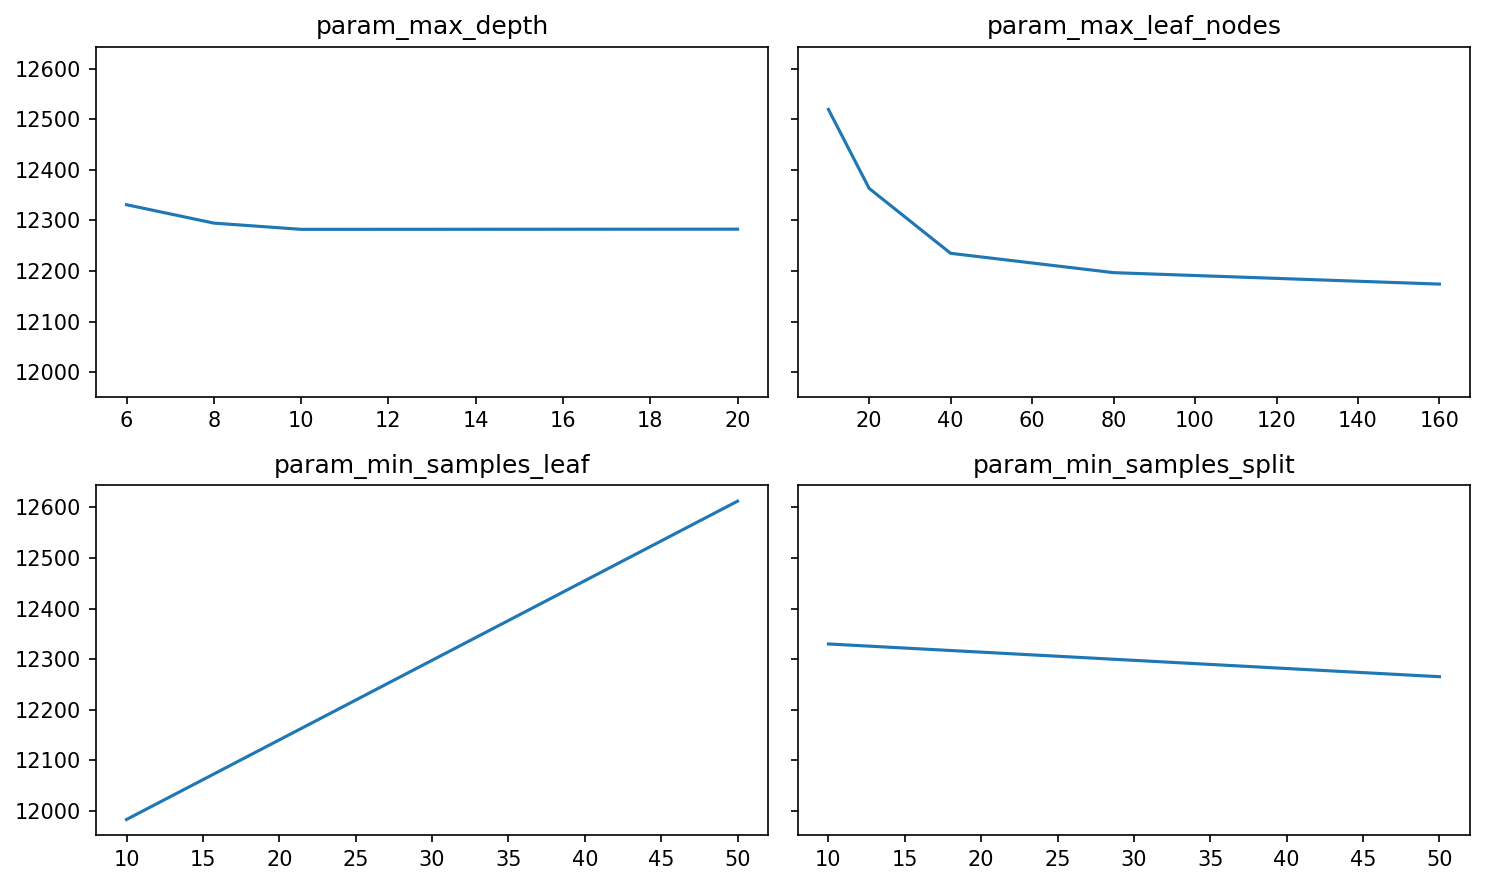

In [70]:
cv_results = pd.DataFrame(grid_search.cv_results_)

filtered_cv = cv_results.filter(like="param").drop(columns ="params")

filtered_cv["score"] = np.sqrt(abs(cv_results["mean_test_score"]))


fig, axes = plt.subplots(2,2, figsize = (10,6), dpi = 150, sharey = True)
axes = axes.flat
for i, col in enumerate(filtered_cv.columns[:-1]):
    data = filtered_cv.groupby(by = col)["score"].mean()
    sns.lineplot(x = data.index, y = data.values, ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel("")
plt.tight_layout()
plt.show()

In [71]:
# for _ in tqdm(range(3)):
#     params_tree2 = {}
#     for k,v in grid_search.best_params_.items():
#         params_tree2[k] = [l for l in range(v-1, v+2)]

#     grid_search = GridSearchCV(estimator=decision_tree, param_grid=params_tree2, cv = 5, scoring="neg_mean_squared_error", verbose = 1, n_jobs = -1)
#     grid_search.fit(X_train, y_train)
    


In [72]:
# cv_results2 = pd.DataFrame(grid_search.cv_results_)

# filtered_cv2 = cv_results2.filter(like="param").drop(columns ="params")

# filtered_cv2["score"] = np.sqrt(abs(cv_results2["mean_test_score"]))


# fig, axes = plt.subplots(2,2, figsize = (10,6), dpi = 150, sharey = True)
# axes = axes.flat
# for i, col in enumerate(filtered_cv2.columns[:-1]):
#     data = filtered_cv2.groupby(by = col)["score"].mean()
#     sns.lineplot(x = data.index, y = data.values, ax=axes[i])
#     axes[i].set_title(col)
#     axes[i].set_xlabel("")
# plt.tight_layout()
# plt.show()

In [73]:
# gs = GridSearchCV(estimator=decision_tree, param_grid={'max_depth': [6,7],
#                                                     'max_leaf_nodes': [a for a in range(80,100)],
#                                                     'min_samples_leaf': [7,8],
#                                                     'min_samples_split': [6,7]}, cv=5).fit(X_train, y_train)
# cvresults = gs.cv_results_
# bes_tree = gs.best_estimator_

In [74]:
# filtered_cv2 = pd.DataFrame(cvresults).filter(like="param").drop(columns ="params")

# filtered_cv2["score"] = np.sqrt(abs(cv_results2["mean_test_score"]))


# fig, axes = plt.subplots(2,2, figsize = (10,6), dpi = 150, sharey = True)
# axes = axes.flat
# for i, col in enumerate(filtered_cv2.columns[:-1]):
#     data = filtered_cv2.groupby(by = col)["score"].mean()
#     sns.lineplot(x = data.index, y = data.values, ax=axes[i])
#     axes[i].set_title(col)
#     axes[i].set_xlabel("")
# plt.tight_layout()
# plt.show()

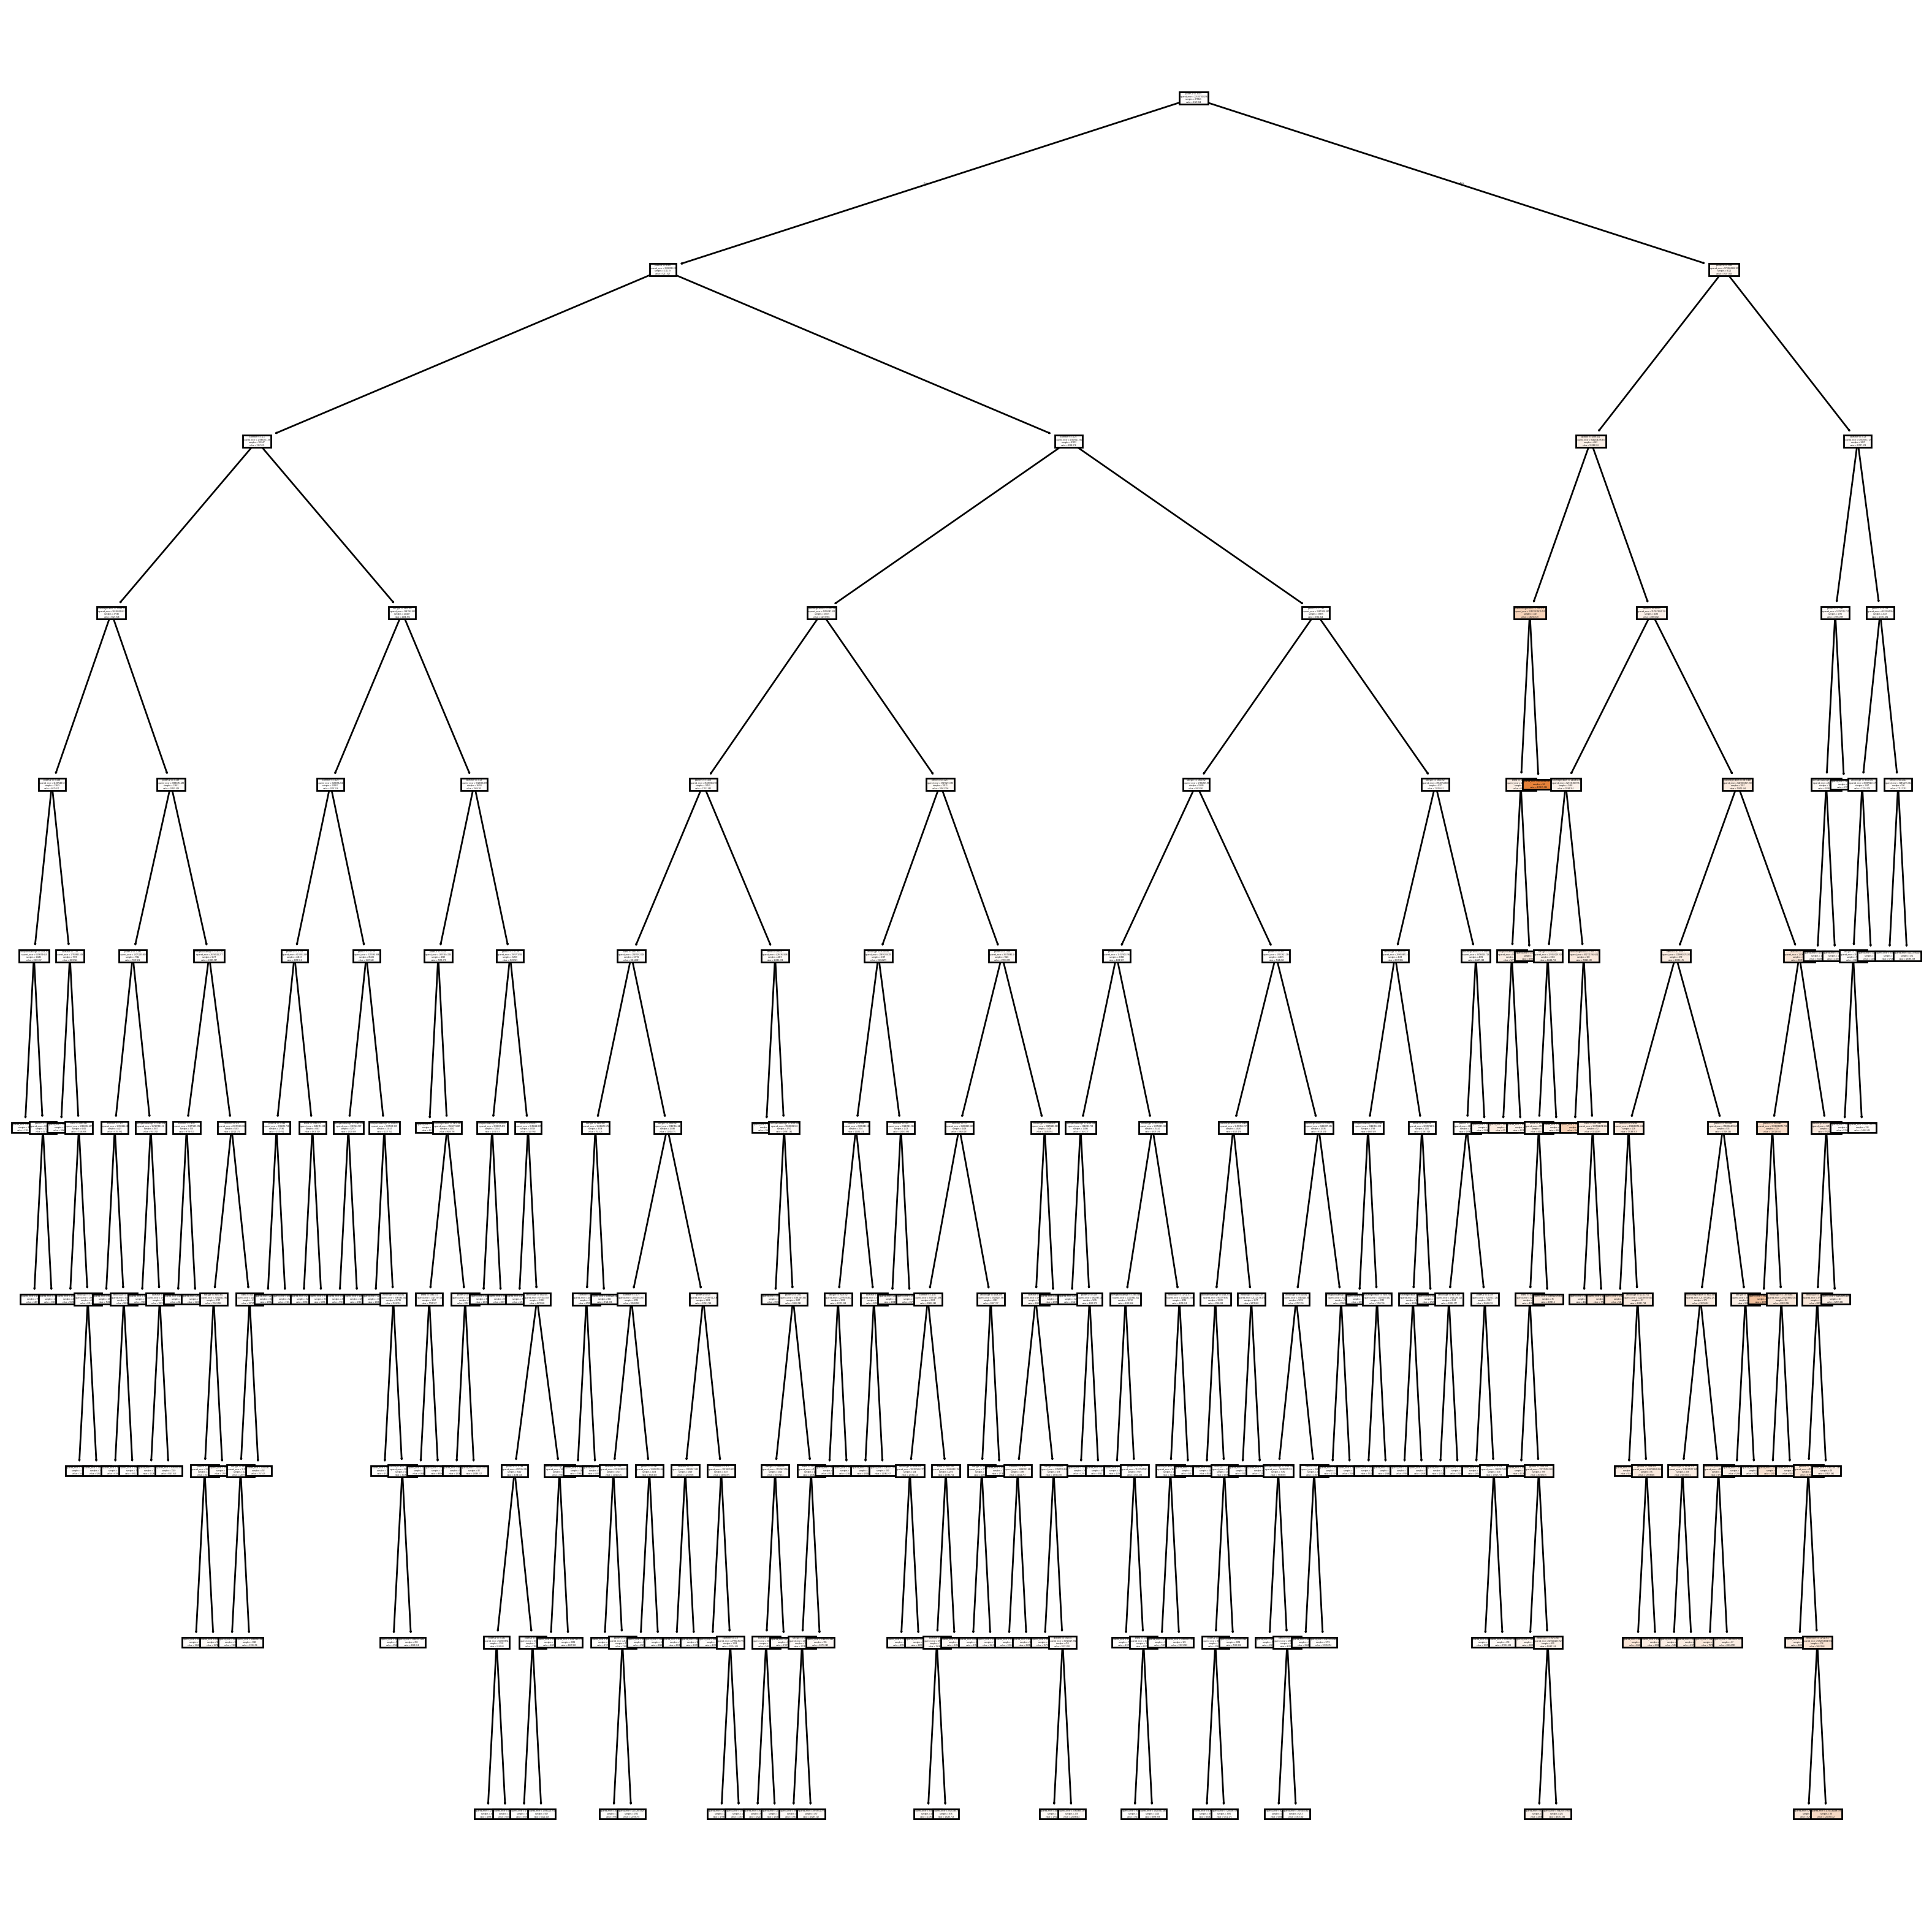

In [75]:
plt.figure(dpi = 200, figsize = (20,20))
plot_tree(decision_tree=best_tree, feature_names=X.columns, filled=True)
plt.show()

In [76]:
importances = pd.DataFrame(best_tree.feature_importances_, index = X.columns, columns=["Importance"])

In [77]:
importances.sort_values(by = "Importance",ascending=False)

,Importance
powerCV,0.567960
monthOfRegistration,0.146395
kilometer,0.084705
gearbox,0.076681
yearOfRegistration,0.046362
brand,0.038117
fuelType,0.017203
vehicleType,0.011146
lastSeen,0.007484
notRepairedDamage,0.003948


In [78]:
def metricas(y_train, y_train_pred, y_test, y_test_pred):
    metricas = {
    'train': {
        'r2_score': r2_score(y_train, y_train_pred),
        'MAE': mean_absolute_error(y_train, y_train_pred),
        'MSE': mean_squared_error(y_train, y_train_pred),
        'RMSE': np.sqrt(mean_squared_error(y_train, y_train_pred))
    },
    'test': {
        'r2_score': r2_score(y_test, y_test_pred),
        'MAE': mean_absolute_error(y_test, y_test_pred),
        'MSE': mean_squared_error(y_test, y_test_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_test_pred))

    }
}
    return metricas

In [79]:
y_train_pred = best_tree.predict(X = X_train)
y_test_pred = best_tree.predict(X = X_test)

In [80]:
pd.DataFrame(metricas(y_train, y_train_pred, y_test, y_test_pred)).T

,r2_score,MAE,MSE,RMSE
train,0.365566,2255.229027,1.417370e+08,11905.336541
test,0.300449,2270.200271,2.174832e+08,14747.313252


Text(0.5, 0, 'Precio real')

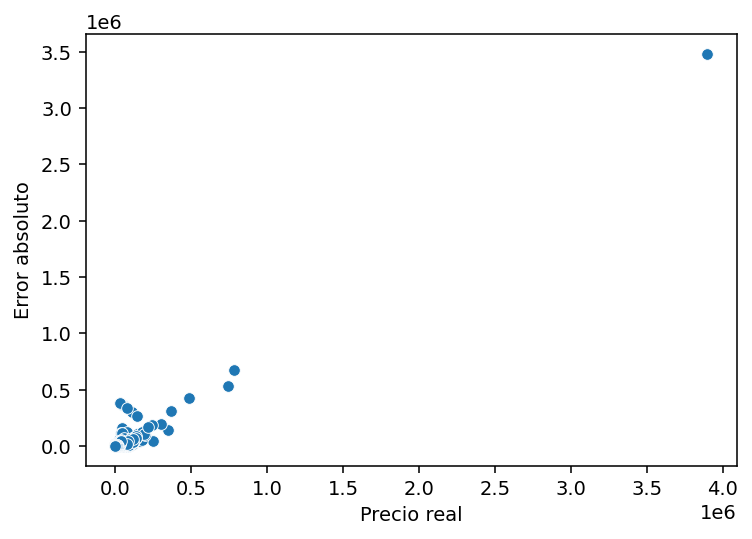

In [81]:
plt.figure(dpi = 140, figsize = (6,4))
sns.scatterplot(x = y_test, y = abs(y_test_pred-y_test))
plt.ylabel("Error absoluto")
plt.xlabel("Precio real")